![ICL](Images/imperiallogo.jpeg)

# Bayesian methods in ecology and evolution

https://bitbucket.org/mfumagal/statistical_inference

## day 2a: prior distributions

### Intended Learning Outcomes

At the end of this part you will be able to:
* describe the pros and cons of using different priors (e.g. elicited, conjugate, ...);
* evaluate the interplay between prior and posterior distributions,
* calculate several quantities of interest from posterior distributions,
* apply Bayesian inference to estimate population variation data.

One of the main feature of Bayesian statistics is that we assign probability distributions not only to
data variables ${y}$ but also to parameters ${\theta}$.
We quantify whatever feelings or believes we have about ${\theta}$ before observing ${y}$.

Using Bayes' theorem, we obtain a posterior distribution of ${\theta}$, a blend of the information between the data and the prior.

How can we decide which prior distribution is more appropriate in our study?

Prior distributions can
* be derived from past information or personal opinions from experts;
* be distributed as familiar distribution functions;
* bear little information.

### Elicited priors

The simplest approach to specify $\pi(\theta)$ is to define the collection of $\theta$ which are possible.

Then one can assign some probability to each one of these cases and make sure that they sum to $1$.

If $\theta$ is discrete, this looks like a natural approach.

Imagine that your prior distribution describes the number of kits a mother rabbit will have in the next litter.

Perhaps, you want to make some inference on the biological mechanisms for the number of kits.
In this case you may have a likelihood function relating some observations $\vec{y}$ (e.g. genetic or environmental markers) to the number of kits $\theta$.

$\theta$ is clearly discrete and you may have some past information on its distribution from the [literature](www.reference.com/pets-animals).

![](Images/Rabbits.jpeg)

"Rabbits can have anywhere from one to 14 babies, also called kits, in one litter. An average litter size is 6. 
Hereditary and environmental factors play a role in the number of kits born in a litter."

\begin{equation}
    \pi(\theta=0)=\pi(\theta>14)=0
\end{equation}

If it is more probable that a mother will have $6$ kits, as this is the average litter size based on past information, then
\begin{equation}
    \pi(\theta=2)<\pi(\theta=6)>\pi(\theta=10)
\end{equation}

We must ensure that
\begin{equation}
    \sum_{i=1}^{14} \pi(\theta=i) = 1
\end{equation}

On the other hand, it $\theta$ is continuous, a simple solution would be to discretise the prior distribution by assigning masses to intervals.
In other words, you create a histogram prior for $\theta$.

Imagine that your prior distribution specifies the recorded temperature in hot springs
at Lassen Volcanic National Park.
Specifically, you are interested in relating the temperature of different pools at Bumpass
Hell with the occurrence of certain extremophile micro-organisms, capable of surviving in extremely hot environments.

You want to assign a prior distribution for the pool temperature, $\theta$.
Clearly $\theta$ is continuous.

<img src="Images/BumpassHell.jpeg" width="600" height="600" />

From past observations, we know that pool temperatures, $\theta$ have a range of $(80,110)$ with an average of $88$, in Celsius degrees.

A simple solution would be to derive a prior histogram of $\theta$, as
\begin{equation}
    \pi(80 \leq \theta < 85) < \pi(85 \leq \theta < 90) > \pi(90 \leq \theta < 95)
\end{equation}

Again, you have to make sure that all these probabilities sum to $1$.

Furthermore, it is important that the histogram is sufficiently wide, as the posterior will have support only for values that are included in the prior.

Alternatively, we may assume that the prior distribution for $\theta$ belongs to a parametric distributional family $\pi(\theta|\nu)$.

Here we choose $\nu$ so that $\pi(\theta|\nu)$ closely matches our elicited beliefs.

This approach has several advantages:

* it reduces the effort to the elicitee (you don't have to decide a probability for each value $\theta$ can have);
* it overcomes the finite support problem (as in the case of the histogram);
* it may lead to simplifications in the computation of the posterior (as we will see later on).

A limitation of this approach is that it would be impossible to find a distribution that perfectly matches the elicitee's beliefs.

For instance, the prior for temperatures could be Normally distributed as $N(\mu,\sigma^2)$ bounded at $(80,110)$, that is

\begin{align}
        \pi(\theta) &= 0 & \text{for } \theta < 80 \text{ or } \theta > 110 \\
        \pi(\theta) &= N(\mu,\sigma^2) & \text{for } 80 \leq \theta \leq 110
\end{align}

with $\mu=88$ and $\sigma^2=10$.

In [ ]:
## elicited prior
mu <- 88
sigma2 <- 10
x <- seq(80,110,0.1)
plot(x=x, dnorm(x=x, mean=mu, sd=sqrt(sigma2)), type="l", lty=1, ylab="Density",
    xlab=expression(theta), main=expression(pi(theta)))

Note that this distribution is not defined outside the interval $(80,110)$.
Consequentely, the posterior distribution will not have mass outside this interval.
Overconfidence may result into failing to condition on events outside the range of personal experience or previous observations.
For instance, the fact that a temperature lower than $80$ has never been observed may be better represented by setting a small (but greater than 0) probability of occurring.

As a rule of thumb, for elicited priors, it is recommended to focus on quantiles close to the middle of the distribution (e.g. the $50^{th}$, $25^{th}$ and $75^{th}$) rather than extreme quantiles (e.g. the $95^{th}$ and $5^{th}$).
You should also assess the symmetry of your prior.

Elicited priors can be updated and reassessed as new information is available.

They are very useful for experimental design where some ideas on the nature of the studied system is given in input.

### Conjugate priors

When choosing a prior distribution $\pi(\theta|\nu)$ some family distributions will make the calculation of posterior distributions more convenient than others will do.

It is possible to select a member of that family that is _conjugate_ with the likelihood $f(y|\theta)$, so that the posterior distribution $p(\theta|y)$ belongs to the same distributional family as the prior.

Suppose we are interested in modelling the arrival of herds of elephants to a specific water pond in the savannah in a day during the migratory season.
We may be interested in this estimate for tracking migratory routes or assessing population sizes.

<img src="Images/Elephants.jpeg" width="600" height="600" />

$Y$ is the count of distinct elephant herds or groups (not the total number of elephants!) arriving at the pool in a day during the migration season (not during the whole year!).

A Poisson distribution has a natural interpretation to model arrival rates for discrete variables.

Indeed, the Poisson distribution is a discrete probability distribution that gives the probability of a given number of events occurring in a fixed interval of time (or space) when such events occur independently and with a known average rate.

The Poisson distribution is an appropriate model under certain assumptions:
1. $Y$ is the number of times an event occurs in an interval and it can take values any positive integer values including 0;
2. the occurrence of one event does not affect the probability that a second event will occur (i.e. events occur independently);
3. the rate at which events occur is constant (it cannot be higher in some intervals and lower in other intervals);
4. two events cannot occur at exactly the same instant;
5. the probability of an event in an interval is proportional to the length of the interval.

Condition 1 is clearly met in our case.
Conditions 2 and 4 assumes that different herds do not follow each other (perhaps
by taking different routes).
For the sake of illustrating this distribution, we will assume this to be true.
You can see that if $Y$ were the number of elephants (not the herds) then condition 2 is
not met as elephants tend to migrate in group.
Condition 3 is met when we focus our analysis on the annual period where we expect
to see herds, not during the whole year.
Condition 5 is easily met, as the number of herds arriving in a week is likely to be
higher than the number in a day.
If we assume that all these conditions are true, then $Y$, the number of elepehant herds
arriving at a pool, is a Poisson random variable.

The event $Y$ can occur $0, 1, 2, ...$ times in the interval.
The average number of events in an interval is the parameter $\theta$.

The probability of observing $y$ events in an interval is given by
\begin{equation}
    f(y|\theta) = \frac{e^{-\theta}\theta^y}{y!} \text{, } y \in \{0, 1, 2, ...\} 
        \text{, } \theta>0
\end{equation}

Here $\theta$ is the event rate, or the rate parameter.

Note that the equation above is a probability mass function (pmf), as it is defined only for discrete values of $y$.

Note that the parameter of the Poisson distribution is typically written as $\lambda$.

This is our __likelihood__ distribution and, once we know $\theta$, then the whole distribution is defined.

$\theta$ has to be positive (not necessarily an integer) and $y$ is a positive integer.

Assuming that the rate $\theta$ is set to $4$ (4 herds per day during migration season), then:
\begin{align}
    P(y=0) &= \frac{e^{-4}4^0}{0!} = e^{-4} = 0.0183\\
    P(y=1) &= \frac{e^{-4}4^1}{1!} = ... = 0.0733\\
    P(y=2) &= \frac{e^{-4}4^2}{2!} = ... = 0.147
\end{align}

In [ ]:
## Poisson distribution
theta <- 4
y <- seq(0, 20, 1)
plot(x=y, dpois(x=y, lambda=theta), type="p", lty=1, xlab=expression(y),
    main=expression(theta~"="~theta), ylab=expression(p(Y~"="~y~"|"~theta)))

As you can see, the highest mass is towards 4 and above 12 the probability is very close to 0.
You may recall that a Poisson distribution has expected value and variance equal to the rate parameter.
Note that we have some non-zero probability of observing 0 events.

We now need to define a __prior__ distribution for $\theta$ having support for positive values.

A reasonable choice is given by the Gamma distribution
\begin{equation}
    \pi(\theta) = \frac{\theta^{\alpha-1}e^{-\theta/\beta}}{\Gamma(\alpha)\beta^\alpha} 
    \text{, } \theta>0 \text{, } \alpha>0 \text{, } \beta>0
\end{equation}
$\alpha$ is the shape parameter and $\beta$ is the rate parameter.

\begin{align}
    E(G(\alpha,\beta)) &= \alpha\beta\\
    Var(G(\alpha,\beta)) &= \alpha\beta^2
\end{align}

The Gamma distribution is the prior distribution, that is $\theta \sim G(\alpha,\beta)$.
The Gamma distribution is a two-parameter family of continuous probability distributions.
Please note that the common exponential distribution and chi-squared distribution are special cases of the Gamma distribution.

We have also suppressed the dependency of $\pi$ to hyperparameters $\nu=(\alpha,\beta)$ since we assume them to be known.

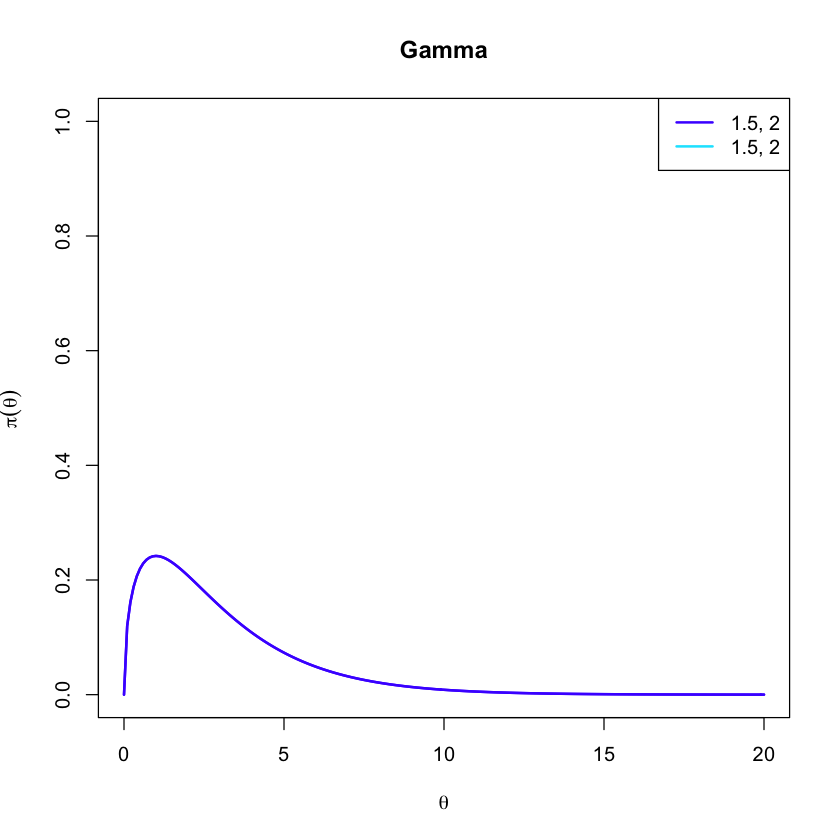

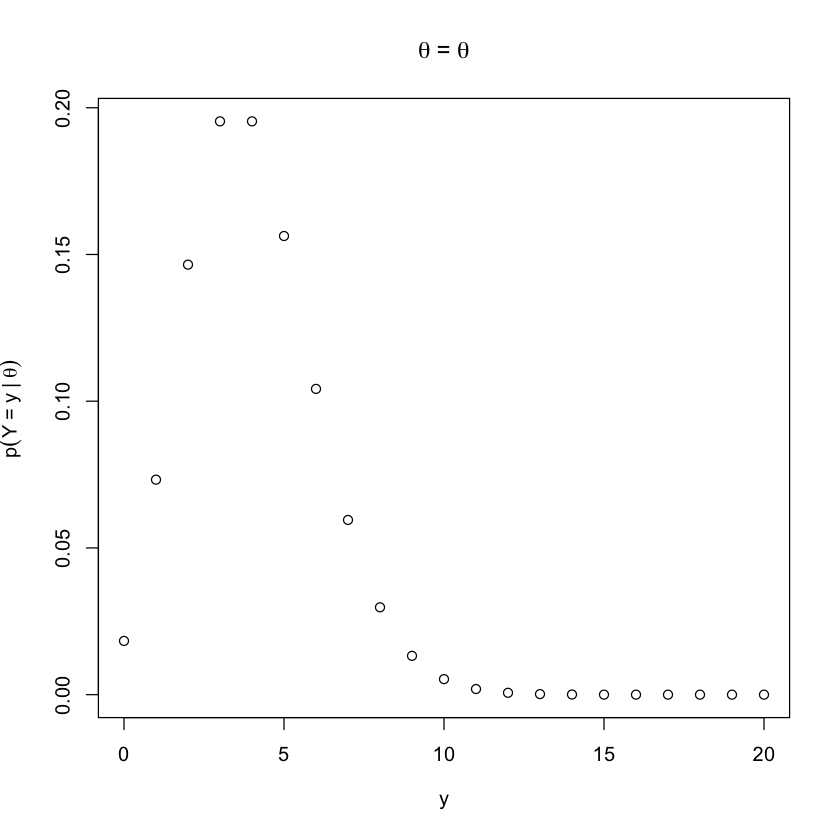

In [4]:
## Gamma distribution
alpha <- 1
beta <- 3
thetas <- seq(0, 20, 0.1)

mycolors <- topo.colors(6)
plot(x=thetas, dgamma(x=thetas, shape=alpha[1], scale=beta[1]), type="l",
    lty=1, xlab=expression(theta), main="Gamma", ylab=expression(pi(theta)),
    ylim=c(0,1.0), col=mycolors[1], lwd=2)

index <- 0
for (i in alpha) {
    for (j in beta) {
        index <- index+1
        points(x=thetas, dgamma(x=thetas, shape=i, scale=j),col=mycolors[index], ty="l", lwd=2)
    }
}

names <- cbind(rep(alpha,each=2),rep(beta))

legend(x="topright", legend=apply(FUN=paste, MAR=1, X=names, sep="", collapse=", "), col=mycolors, lty=1, lwd=2)

## Poisson distribution
theta <- 4
y <- seq(0, 20, 1)
plot(x=y, dpois(x=y, lambda=theta), type="p", lty=1, xlab=expression(y),
    main=expression(theta~"="~theta), ylab=expression(p(Y~"="~y~"|"~theta)))

## Posterior
prior <- dgamma(x=thetas, shape=alpha, scale=beta)
likelihood <- dpois(x:0:20,lamda=4)
posterior <- dgamma(x=thetas, shape=alpha+4, scale=)

The Gamma distribution is very flexible and it can have one tail ($\alpha \leq 1$) or two tails ($\alpha > 1$).
For very large values of $\alpha$ the Gamma distribution resembles a Normal distribution.
The $\beta$ parameter shrinks or stretches the distribution relative to 0 but it doesn't change its shape.

Using the Bayes' theorem, we can now obtain the posterior probability
\begin{align}
    P(\theta|y) &\approx f(y|\theta)\pi(\theta)\\
                &\approx (e^{-\theta}\theta^y)(\theta^{\alpha-1}e^{-\theta/\beta})\\
                &= \theta^{y+\alpha-1}e^{-\theta(1+1/\beta)}
\end{align}

Since we are only interested in a normalised function of $\theta$, we drop all functions that do not depend on $\theta$.

The posterior distribution is a Gamma distribution $G(\alpha',\beta')$ with $\alpha'=y+\alpha$ and $\beta'=(1+1/\beta)^{-1}$.

We were able to do this operation because the Gamma distribution (prior) is the conjugate family for the Poisson distribution (likelihood).

__ACTIVITY__

Suppose that, before looking at the actual data, we have some intuition that we expect to see 3 herds per day.
Let's also assume that we are not extremely confident and we assign a moderate variance to it.

We then observed 4 herds.

_Derive and plot the posterior distribution using bot the exact solution and Monte Carlo sampling._

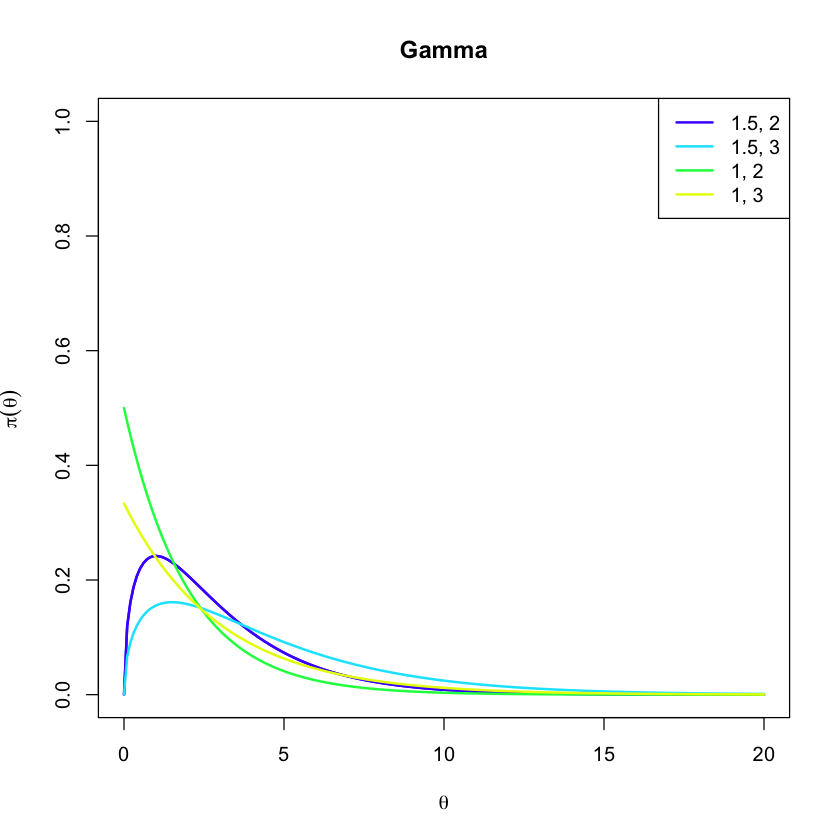

In [5]:
## Gamma distribution
alpha <- c(1.5,1)
beta <- c(2,3)
thetas <- seq(0, 20, 0.1)

mycolors <- topo.colors(6)
plot(x=thetas, dgamma(x=thetas, shape=alpha[1], scale=beta[1]), type="l",
    lty=1, xlab=expression(theta), main="Gamma", ylab=expression(pi(theta)),
    ylim=c(0,1.0), col=mycolors[1], lwd=2)

index <- 0
for (i in alpha) {
    for (j in beta) {
        index <- index+1
        points(x=thetas, dgamma(x=thetas, shape=i, scale=j),col=mycolors[index], ty="l", lwd=2)
    }
}

names <- cbind(rep(alpha,each=2),rep(beta))

legend(x="topright", legend=apply(FUN=paste, MAR=1, X=names, sep="", collapse=", "), col=mycolors, lty=1, lwd=2)


#Gamma
alpha <- 1
beta <-3
theta<- seq(0,20,0.1)
prior <-dgamma(x=theta,shape=alpha,scale=beta)
likeli <

### Noninformative priors

If no reliable prior information on ${\theta}$ is available,  can we still employ a Bayesian approach?

It is still appropriate if we find a distribution $\pi({\theta})$ that contains "no information" about ${\theta}$, in the sense that it does not favour one value over another.

We refer to such a distribution as a _noninformative prior_ for ${\theta}$.

All the information in the posterior will arise from the data.

If the parameter space is discrete and finite, that is, $\vec{\theta}=\{\theta_1, \theta_2, ..., \theta_n\}$, a possible noninformative prior is
\begin{equation}
    p(\theta_i) = \frac{1}{n} \text{, } i=1, 2, ...,n 
\end{equation}

The prior distribution must be a proper (legitimate) probability distribution, meaning that
\begin{equation}
    \sum_1^n \frac{1}{n}=1 
\end{equation}

If $\vec{\theta}$ is continuous and bounded, as $\vec{\theta}=[a,b]$ with $-\infty<a<b<+\infty$,
a uniform prior in the form
\begin{equation}
    P(\theta) = \frac{1}{b-a} \text{, } a<\theta<b
\end{equation}
is a noninformative prior distribution.

This assertion is less clear to be true than in the discrete case.

If $\vec{\theta}$ being continuous and unbounded, so that $\vec{\theta}=(-\infty,+\infty)$, a noninformative prior could be set as
\begin{equation}
    P(\theta) = c \text{, any } c>0 
\end{equation}

However, this distribution is clearly _improper_ as
\begin{equation}
    \int_{-\infty}^{+\infty} p(\theta) d\theta = +\infty 
\end{equation}
This may suggest that in this case a Bayesian approach cannot be used.

However, a Bayesian inference is still possible if the integral of of the likelihood
$f({y}|\theta)$ with respect to $\theta$ equals some finite value $K$, since
\begin{equation}
    \int \frac{f({y}|\theta) \cdot c}{\int f({y}|\theta) \cdot c d\theta} d\theta = 1
\end{equation}

<img src="Images/Elephants.jpeg" width="400" height="400" />

If use a uniform prior $U$ for the mean arrival $\theta$, our parameter, it should be $[0,+\infty)$.
However, we can limit the range define a uniform prior distribution as $U(0,100)$.

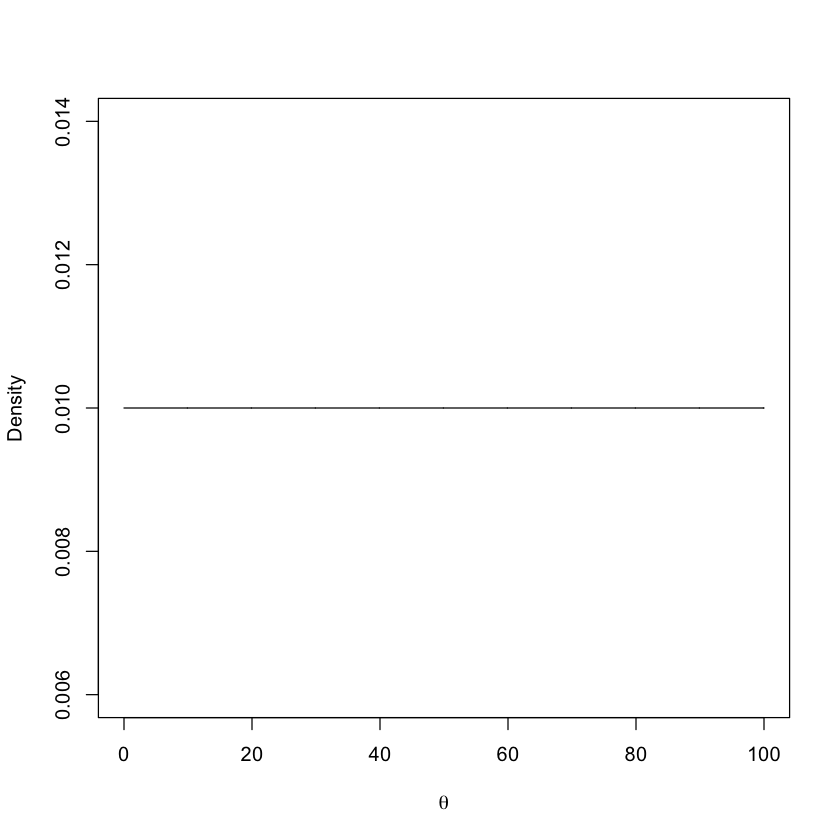

In [6]:
## Uniform distribution
theta <- seq(0, 100, 0.1)
prior <- dunif(x=theta, min=0, max=100)
plot(x=theta, y=prior, xlab=expression(theta), ylab="Density", type="l")

This choice rules out scenarios that are impossible in real life.
This means that the posterior will be truncated at 0 and 100.
As we lack a conjugate model, we can sample from the posterior to obtain its distribution.

Noninformative priors are related to the notion of _reference_ priors.
These are not necessarily noninformative but a convenient, default choice for prior distributions.

### Hierarchical modelling

A posterior distribution is typically obtained with two stages, one for $f({y},{\theta})$, the likelihood of the data, and one for $\pi({\theta}, {\nu})$, the prior distribution of ${\theta}$ given a vector of _hyperparameters_ ${\nu}$.

Note that we drop the notation of all these parameters being vectors for simplicity.

If we are uncertain about the values for ${\nu}$, we need an additional stage, a _hyperprior_, defining the density
distribution of hyperparameters.

If we denote this distribution as $h({\nu})$, then the posterior distribution is
\begin{equation}
P({\theta}|{y}) = \frac{ \int f({y}|{\theta})\pi({\theta}|{\nu})
               h({\nu})d{\nu} }{ \int \int f({y}|{\theta})\pi({\theta}|
              {\nu})h({\nu})d{\nu}d{\theta} } 
\end{equation}

Another possibility is to replace ${\nu}$ with an estimate $\hat{{\nu}}$ obtained by maximising the marginal distribution $m({y}|{\nu})$.

Inferences are made on the _estimated posterior_ $P({\theta}|{y},\hat{{\nu}})$, by inserting $\hat{{\nu}}$ in the Bayes' theorem equation.

This approach is called _Empirical Bayesian_ analysis as we are using the data to estimate the hyperparameter.

The empirical estimation of the prior seems a violation of Bayesian principles.
Indeed, the update of the prior based on the data would use the data twice, both for the likelihood and the prior.
Inferences from such modelling tend to be "overconfident" and methods that ignore this fact are called _naive Empirical Bayesian_ approaches.

${\nu}$ can depend on a collection of unknown parameters $\lambda$, with $h(\nu|\lambda)$ and a third-stage prior $g(\lambda)$.

This procedure of specifying a model over several layers is called _hierarchical modelling_.

This framework is very much used in graphical modelling (e.g. Bayesian networks).
As we add extra layers and levels of randomness, subtle changes at the top levels (hyperpriors) will not have a strong effect at the bottom level (the data).